# Exploratory Data Analysis (EDA)

[seaborn](https://seaborn.pydata.org/)

In [1]:
import pandas as pd
import seaborn as sns

C:\Users\Jimmy\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Jimmy\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Jimmy\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
grades = pd.read_csv("./data.csv")

## Histograms

<AxesSubplot:xlabel='Grade_Final', ylabel='Count'>

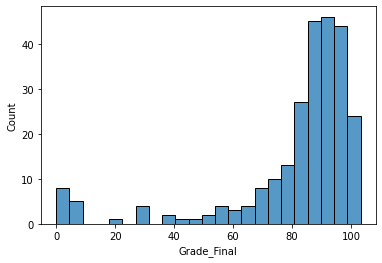

In [3]:
# Talk about the ceiling effect
sns.histplot(data=grades, x="Grade_Final")

<AxesSubplot:xlabel='Grade_Final', ylabel='Count'>

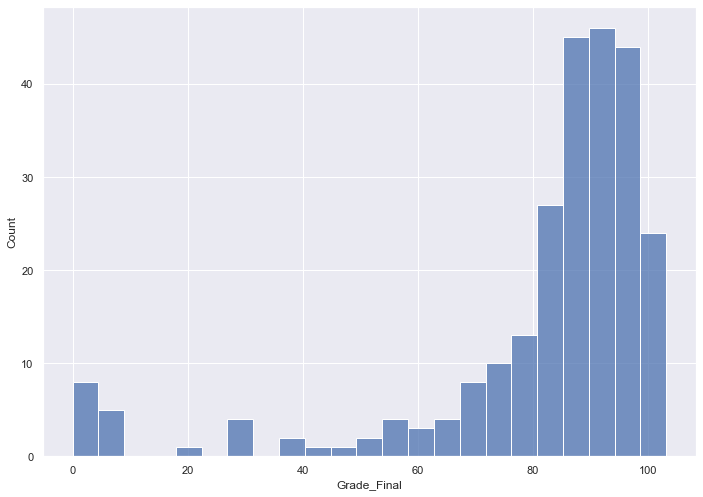

In [4]:
# It's a bit small, so let's increase the plot size
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=grades, x="Grade_Final")

### Hue

If you're making a visulization (histogram, scatterplot, boxplot, etc.), and find yourself wanting to compare that plot across different discrete variables, color or hue is a great way of doing that.

Many seaborn plots have the option to specify a variable to be the `hue`, and automatically splits and plots the data accordingly.

For example, our main question we want to answer is if hints help. Let's use `hints` as our hue variable and compare the distributions.

<AxesSubplot:xlabel='Grade_Final', ylabel='Count'>

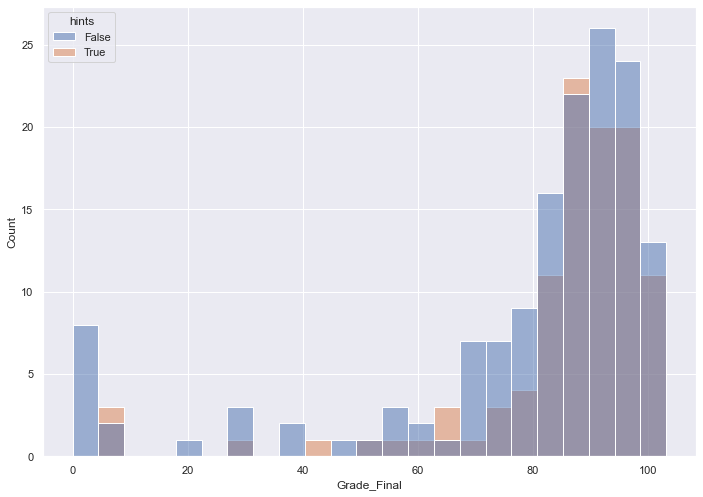

In [5]:
sns.histplot(data=grades,x="Grade_Final",hue="hints")

<AxesSubplot:xlabel='Grade_Final', ylabel='Count'>

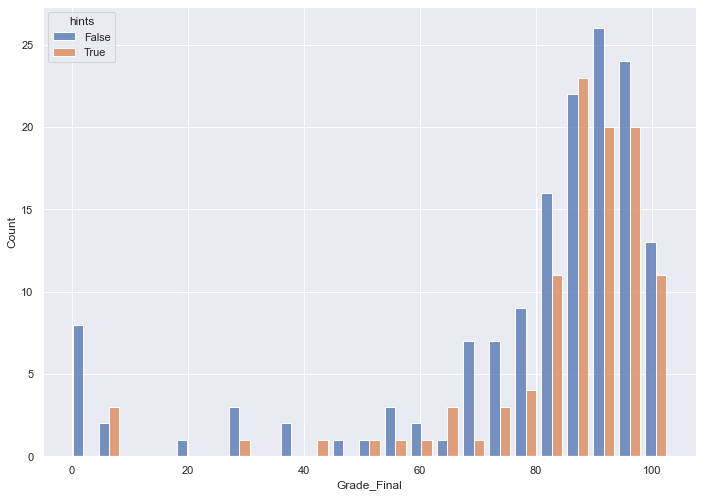

In [6]:
# It can be hard to read, so we can change it a bit
sns.histplot(data=grades,x="Grade_Final",hue="hints", multiple="dodge", shrink=0.8)

### Aside: Respecting the Data

When you're in the thick of the weeds of analysis, looking at plots and charts and tests, it can be hard to remember that the data you're working with can representing things in the real world. Don't forget that!

## Scatterplots

<AxesSubplot:xlabel='Grade_Test1', ylabel='Grade_Final'>

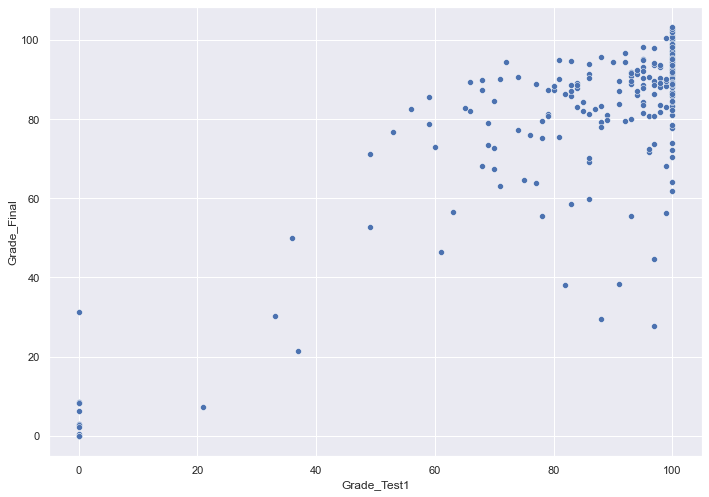

In [8]:
sns.scatterplot(data=grades, x="Grade_Test1", y="Grade_Final")

We can pretty it up by using the `.set` function to give it labels

[Text(0.5, 1.0, 'Final Grade vs. Test 1 Grade'),
 Text(0.5, 0, 'Test 1 Grade'),
 Text(0, 0.5, 'Final Grade')]

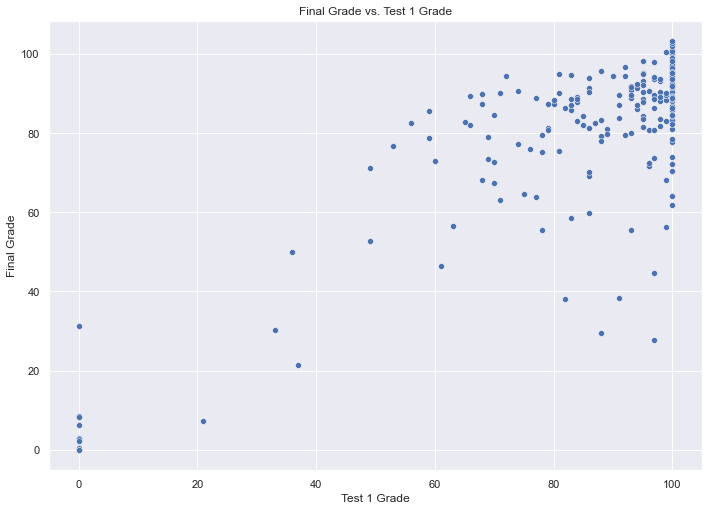

In [9]:
sns.scatterplot(data=grades, x="Grade_Test1", y="Grade_Final").set(title="Final Grade vs. Test 1 Grade", 
                                                                   xlabel= "Test 1 Grade",
                                                                   ylabel= "Final Grade")

## Challenge

Now that you know a little bit about dataframes and how to plot data, you can *really* start asking and answering interesting questions.

### Step 1

Using scatter plots, guess which of these grades had the Using scatter plots, guess which of these grades has the strongest correlation with a student's final grade: `Grade_H1`, `Grade_H6`, `Grade_PreCourse`, `Grade_Test2`.



In [ ]:
# Scatter plot code here

### Step 2

Use the [.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) function to verify your guess. 

Try both the `pearson` (the default) and the `spearman` coefficent. 

What do you notice?



In [10]:
grades[["Grade_H1","Grade_H6","Grade_PreCourse","Grade_Test2","Grade_Final"]].corr(method="spearman")

,Grade_H1,Grade_H6,Grade_PreCourse,Grade_Test2,Grade_Final
Grade_H1,1.000000,0.403985,0.259512,0.265259,0.391441
Grade_H6,0.403985,1.000000,0.379917,0.518645,0.687353
Grade_PreCourse,0.259512,0.379917,1.000000,0.391265,0.417192
Grade_Test2,0.265259,0.518645,0.391265,1.000000,0.719297
Grade_Final,0.391441,0.687353,0.417192,0.719297,1.000000


In [11]:
grades[["Grade_H1","Grade_H6","Grade_PreCourse","Grade_Test2","Grade_Final"]].corr(method="pearson")

,Grade_H1,Grade_H6,Grade_PreCourse,Grade_Test2,Grade_Final
Grade_H1,1.000000,0.540885,0.378992,0.354265,0.624090
Grade_H6,0.540885,1.000000,0.349566,0.605720,0.840978
Grade_PreCourse,0.378992,0.349566,1.000000,0.405166,0.433340
Grade_Test2,0.354265,0.605720,0.405166,1.000000,0.704475
Grade_Final,0.624090,0.840978,0.433340,0.704475,1.000000


### Step 3

Look at both the first few paragraphs and images of the Wikipedia pages for the [Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) and [Spearman](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) coefficent. 

With your group, discuss why they give different scores, and which method makes more sense for this data.

**ANSWER**: Pearson simply looks for a linear corr (e.g. straight line). Meanwhile, Spearman is non-parametric, meaning it doesn't make any assumptions about the shape of the data (e.g. that it should look like a line). Our data is highly skewed (ceiling effect), with a clumps near the top and the bottom, which pearson is sensitive to. Spearman is more robust to these outliers, therefore we can argue it's better suited for this case.

## Pairplots


<AxesSubplot:xlabel='Grade_Test1', ylabel='Grade_Final'>

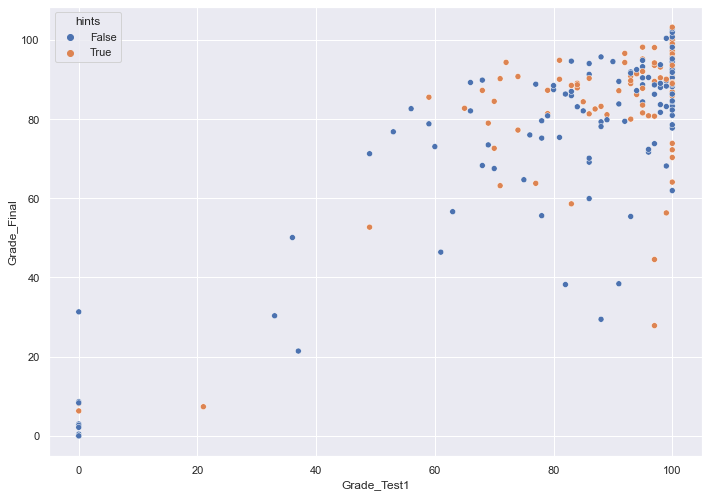

In [12]:
sns.scatterplot(data=grades, x="Grade_Test1", y="Grade_Final", hue="hints")

In [13]:
test_grades = ["Grade_Test1","Grade_Test2","Grade_Test3"]


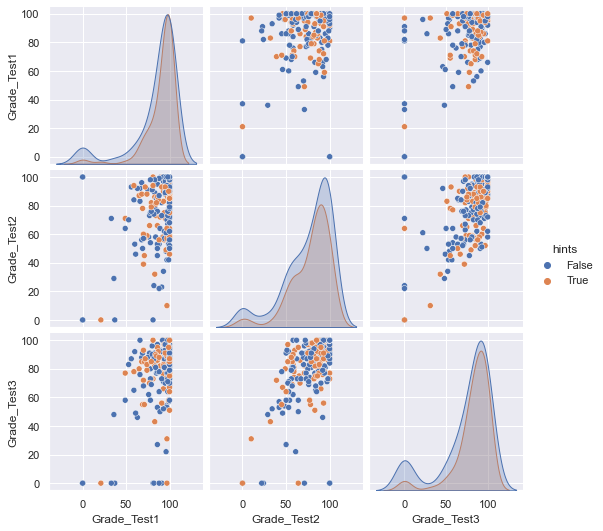

In [14]:
sns.pairplot(grades[test_grades].join(grades["hints"]), hue="hints")

# Boxplots

<AxesSubplot:xlabel='Grade_Final', ylabel='Count'>

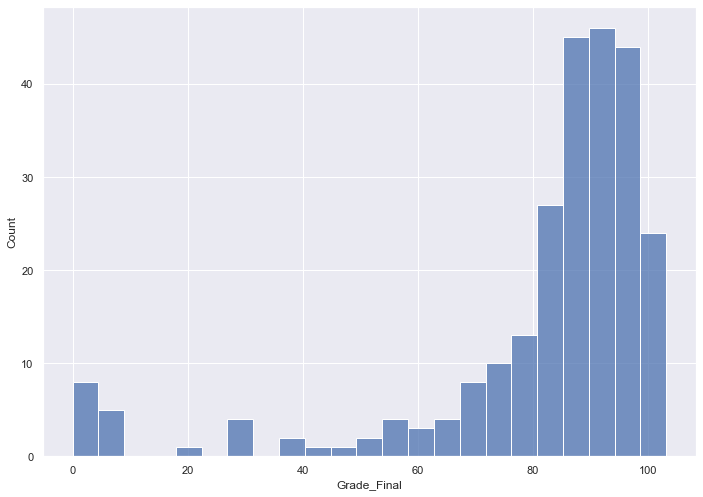

In [25]:
sns.histplot(data=grades, x="Grade_Final")

<AxesSubplot:ylabel='Grade_Final'>

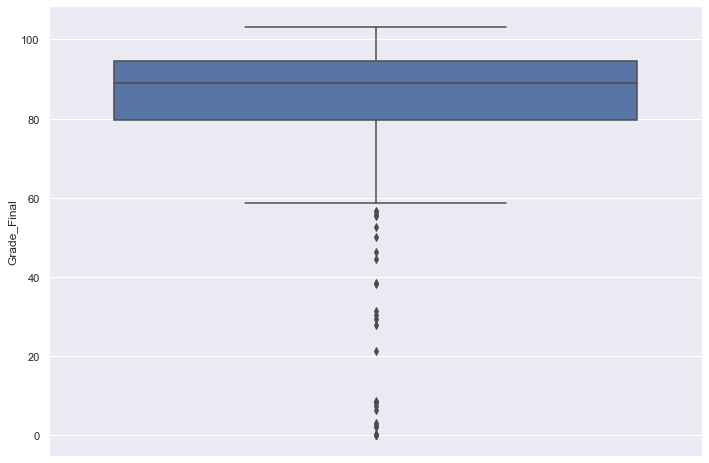

In [58]:
sns.boxplot(data=grades, y="Grade_Final")

<AxesSubplot:xlabel='hints', ylabel='Grade_Final'>

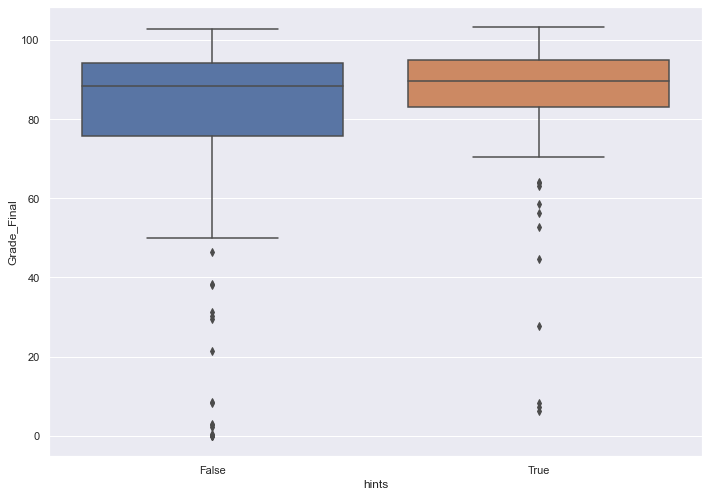

In [36]:
sns.boxplot(data=grades, x="hints", y = "Grade_Final")

## Analysis: Part 1

### T-tests and p-values

At a high level, a t-test aims to see if the means of two populations are the same.

Our null-hypothesis is that the mean final grade score between the hints and non hints group is the same (e.g. hints had no effect). To reject the null hypothesis is to say that the means of the two populations are different, and hints have an effect.

The smaller the p-value, the more confident we can be in rejecting the null hypothesis. Usually, there are certain thresholds that different fields have on how low a p-value can be before one can be convinced in rejecting it. 

p < 0.05 is a common one for situations such as these, but in more robust and rigorous applications (e.g. medicine, particle physics), they can be as slim as 10^(-7)

In [75]:
import scipy.stats as stats

In [76]:
final_grade_hints = grades[grades["hints"]]["Grade_Final"]
final_grade_no_hints = grades[~grades["hints"]]["Grade_Final"]

In [81]:
stats.ttest_ind(final_grade_hints, final_grade_no_hints)

Ttest_indResult(statistic=2.2111754664247285, pvalue=0.02792904496516587)

P-value less that 0.05! We've done it! Hints help!

Hold on... what does the page on t-tests say...
https://en.wikipedia.org/wiki/Student%27s_t-test

"The means of the two populations being compared should follow normal distributions."

### Normality Testing

A lot of statistical tests assume your data is normal! So before jumping in to making a t-test or anything else, you should check first.

Visually is always a good first way to check...

<AxesSubplot:xlabel='Grade_Final', ylabel='Count'>

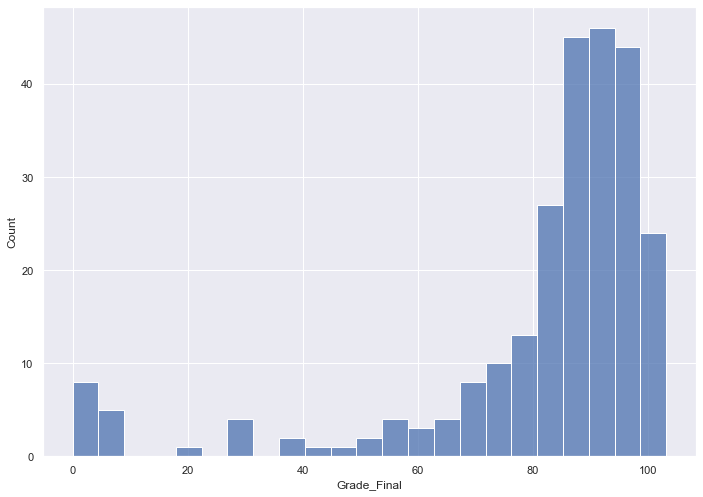

In [80]:
sns.histplot(grades["Grade_Final"])

But there are also more robust ways of checking for normality, such as the [Shapiro-Wilk Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html).

The null hypothesis for this test is that the given distribution is a normal distribution. Having a low p-value, and rejecting the null hypothesis, means the distribution is not normal.

In [92]:
print(stats.shapiro(grades["Grade_Final"]).pvalue)

5.9856174490304395e-21


### Non-parametric Tests

The [Mann-Whitney U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) is a good non-parametric alternative to what you would use a t-test for. I won't go into too much detail on how it actually works, but let it be known that it works well for data that is not normal.

In [93]:
stats.mannwhitneyu(final_grade_hints, final_grade_no_hints)

MannwhitneyuResult(statistic=8732.0, pvalue=0.06910229575003927)

Drat...

No fear, maybe there are different questions we can ask!

## Wide vs. Long Data

Alright, so we have to dig a little bit deeper. Maybe it doesn't impact the final grade. But if hints are given for the homeworks, maybe it *does* help the homeworks. I'd love to be able to see the distributions of all the HW grades at once.

In [55]:
homeworks = grades.iloc[:,2:11]
homeworks

,Grade_H1,Grade_H2,Grade_H3,Grade_H4,Grade_H5,Grade_H6,Grade_H7,Grade_H8,Grade_H9
0,100.000000,100.000000,100.000000,99.324324,100.00,100.000000,84.873950,100.000000,100.000000
1,0.000000,100.000000,6.474820,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
3,100.000000,91.666667,99.280576,100.000000,100.00,100.000000,99.159664,100.000000,100.000000
4,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,86.554622,80.508475,100.000000
...,...,...,...,...,...,...,...,...,...
247,100.000000,100.000000,95.683453,99.324324,86.63,98.326971,94.957983,97.457627,96.551724
248,100.000000,100.000000,98.561151,100.000000,99.42,99.593925,94.957983,100.000000,98.275862
249,95.901639,100.000000,99.280576,100.000000,98.26,100.000000,95.798319,96.610169,100.000000
250,100.000000,100.000000,100.000000,100.000000,99.42,99.593925,94.957983,91.525424,98.275862


There's a bit of a problem though. If we remember

`sns.boxplot(data=grades, x=XX, y = YY)`

We need to get our data in a format where every row is a homework grade. There should be one column which has the name of the assignment, and one column which has the actual grade.

Luckly, pandas has a function that does exactly that! The [.melt()](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) function!

In [60]:
homeworks.melt()

,variable,value
0,Grade_H1,100.000000
1,Grade_H1,0.000000
2,Grade_H1,0.000000
3,Grade_H1,100.000000
4,Grade_H1,100.000000
...,...,...
2263,Grade_H9,96.551724
2264,Grade_H9,98.275862
2265,Grade_H9,100.000000
2266,Grade_H9,98.275862


See how each row represents a single homework grade. The `variable` column shows which HW it comes from, and the `value` column shows the actual grade.

<AxesSubplot:xlabel='variable', ylabel='value'>

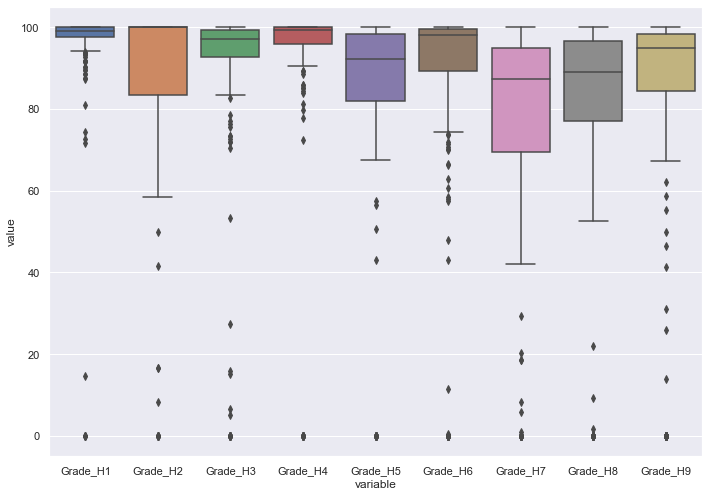

In [63]:
sns.boxplot(data=homeworks.melt(), x="variable",y="value")

### Melting with ID Vars

What I want to see now, like our previous boxplots, is how having hints effect this. I wonder if can do this by melting the dataframe setting the `hue` to the hints var, like I did before. 

In [66]:
homework_hints = homeworks.join(grades["hints"])

In [65]:
homework_hints

,Grade_H1,Grade_H2,Grade_H3,Grade_H4,Grade_H5,Grade_H6,Grade_H7,Grade_H8,Grade_H9,hints
0,100.000000,100.000000,100.000000,99.324324,100.00,100.000000,84.873950,100.000000,100.000000,False
1,0.000000,100.000000,6.474820,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,False
2,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,False
3,100.000000,91.666667,99.280576,100.000000,100.00,100.000000,99.159664,100.000000,100.000000,False
4,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,86.554622,80.508475,100.000000,True
...,...,...,...,...,...,...,...,...,...,...
247,100.000000,100.000000,95.683453,99.324324,86.63,98.326971,94.957983,97.457627,96.551724,True
248,100.000000,100.000000,98.561151,100.000000,99.42,99.593925,94.957983,100.000000,98.275862,False
249,95.901639,100.000000,99.280576,100.000000,98.26,100.000000,95.798319,96.610169,100.000000,False
250,100.000000,100.000000,100.000000,100.000000,99.42,99.593925,94.957983,91.525424,98.275862,True


In [67]:
homework_hints.melt()

,variable,value
0,Grade_H1,100.0
1,Grade_H1,0.0
2,Grade_H1,0.0
3,Grade_H1,100.0
4,Grade_H1,100.0
...,...,...
2515,hints,True
2516,hints,False
2517,hints,False
2518,hints,True


In [71]:
hw_hints_melted = homework_hints.melt(id_vars="hints")
hw_hints_melted

,hints,variable,value
0,False,Grade_H1,100.000000
1,False,Grade_H1,0.000000
2,False,Grade_H1,0.000000
3,False,Grade_H1,100.000000
4,True,Grade_H1,100.000000
...,...,...,...
2263,True,Grade_H9,96.551724
2264,False,Grade_H9,98.275862
2265,False,Grade_H9,100.000000
2266,True,Grade_H9,98.275862


<AxesSubplot:xlabel='variable', ylabel='value'>

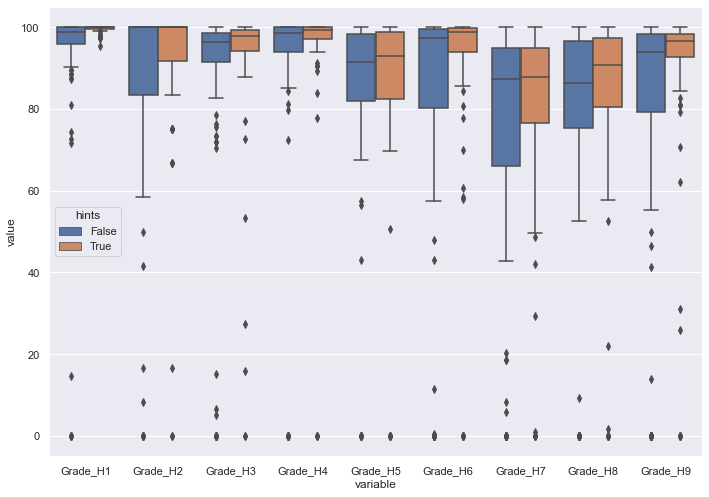

In [72]:
sns.boxplot(data=hw_hints_melted, x="variable", y="value", hue="hints")

### Challenge

Create paired boxplots showcasing the distribution of grades for each test, based on whether the student had hints or not.

<AxesSubplot:xlabel='variable', ylabel='value'>

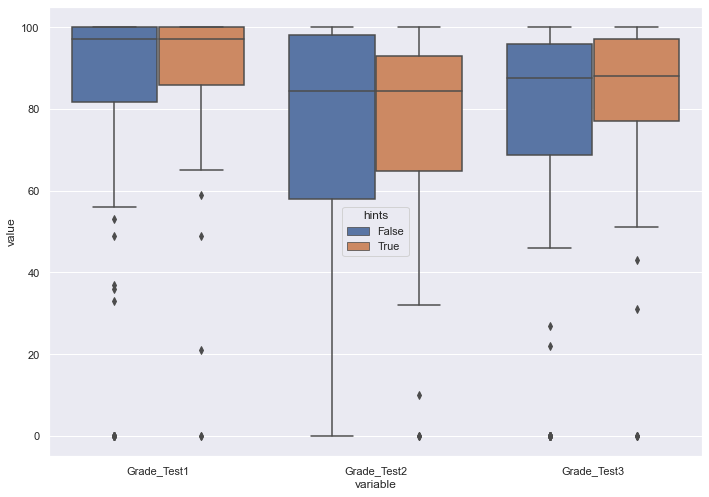

In [74]:
# SOLUTION
test_grades_hints = grades[test_grades].join(grades["hints"])
melted_df_hints = test_grades_hints.melt(id_vars="hints")
melted_df_hints
sns.boxplot(data=melted_df_hints, x="variable", y = "value", hue="hints")

## Challenge 2

With your group. Test the following hypothesis.

> Students who post more on Piazza perform better on the homeworks (i.e. have an average HW grade of 80 or more) compared to those who do not.

Note: The data might have some outliers in it. Use your best judgement to filter out any outliers you might see...

**After testing the hypothesis...**

Discuss with your group the nature of this hypothesis.
- Does it make sense?
- What counfounding variables could there be?
- How could this result be misinterpreted?

<AxesSubplot:xlabel='HW_GOOD?', ylabel='PiazzaPostTotal'>

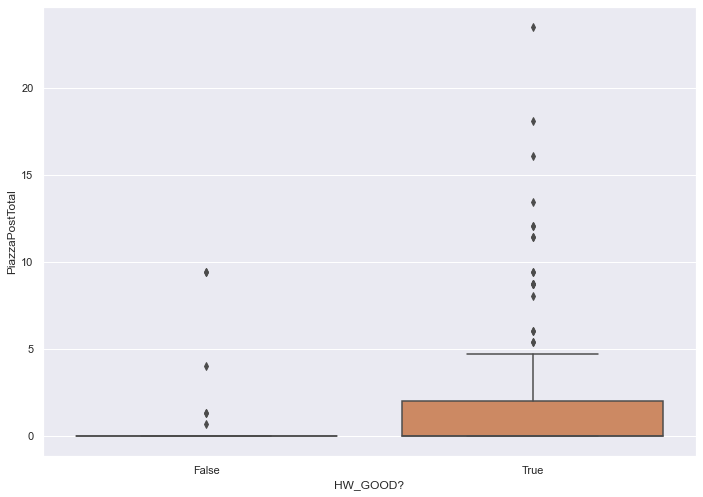

In [178]:
sns.boxplot(data=grades, x="HW_GOOD?", y="PiazzaPostTotal")

In [170]:
# Remove outliers
grades = grades[grades["PiazzaPostTotal"]< 50]

In [172]:
grades["HW_AVG"] = homeworks.mean(axis=1)
grades["HW_GOOD?"] = grades["HW_AVG"] > 80

<ipython-input-172-b5db599f8493>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grades["HW_AVG"] = homeworks.mean(axis=1)


In [176]:
stats.mannwhitneyu(grades[grades["HW_GOOD?"]]["PiazzaPostTotal"],grades[~grades["HW_GOOD?"]]["PiazzaPostTotal"])

MannwhitneyuResult(statistic=6166.5, pvalue=7.810605530692744e-05)